In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import gpytorch
from gpytorch import kernels

import utils
import tqdm

ModuleNotFoundError: No module named 'utils'

# Building GPR model
Let's fit GPR model for function $f(x)=-cos({\pi}x)+sin(4{\pi}x)$ in [0, 1], with noise $y(x)=f(x)+{\varepsilon}, {\varepsilon} ~ {\mathcal{N}}(0, 0.1)$

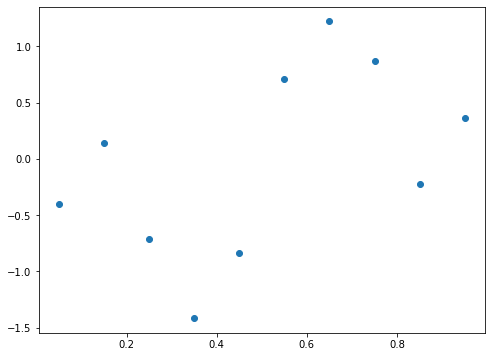

In [4]:
N = 10
X = torch.linspace(0.05, 0.95, N)
y = -torch.cos(np.pi * X) + np.sin(4 * np.pi * X) + torch.randn(N) * 0.1

plt.figure(figsize=(8, 6))
plt.plot(X.numpy(), y.numpy(), 'o')

## 1. Define covariance function

In [5]:
kernel = kernels.ScaleKernel(kernels.RBFKernel())  # RBF ядро умноженное на константу

For most GP regression models, you will need to construct the following GPyTroch objects:
1. A GP Model (gpytorch.models.ExactGP) - most of the inference.
2. A Likelihood (gpythorch.likelihoods.GaussianLikelihood) - LH for GR regression
3. A Mean (gpytorch.means.ConstantMean())
4. A Kernel
5. A MultivariateNormal

In [6]:
# We will use the simplest form of GP model, exact inference
class GPRegressor(gpytorch.models.ExactGP):
    def __init__(self, X, y, kernel, likelihood=None):
        if likelihood is None:
            likelihood = gpytorch.likelihoods.GaussianLikelihood()
        
        super().__init__(X, y, likelihood)
        self.mean = gpytorch.means.ConstantMean()
        self.kernel = kernel
        self.likelihood = likelihood
        
    def forward(self, x):
        mean_x = self.mean(x)
        covar_x = self.kernel(x)
        return gpytorch.distributions.MultitaskMultivariateNormal(mean_x, covar_x)
    
    def predict(self, X):
        self.eval()
        with torch.no_grad():
            pred = self(X)
            return self.likelihood(pred)

In [ ]:
model = GPRegressor(X, y, kernel)
